<a href="https://colab.research.google.com/github/ferchove/fernado_vega/blob/main/semana2/Taller_Forecasting_Ocupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Cargar dataset de ocupacion de sitios de parqueo
datapar  = pd.read_csv("SJ.csv")
datapar.head()

,date,idCompany,numTrx
0,2022-08,1,68599
1,2022-09,1,86862
2,2022-10,1,99611
3,2022-11,1,109018
4,2022-12,1,115665


In [50]:
# Revisar cabecera
datapar.head()


,date,idCompany,numTrx
0,2022-08,1,68599
1,2022-09,1,86862
2,2022-10,1,99611
3,2022-11,1,109018
4,2022-12,1,115665


In [51]:
#cola del dataset
datapar.tail()

,date,idCompany,numTrx
13,2023-09,1,126851
14,2023-10,1,137539
15,2023-11,1,145327
16,2023-12,1,135537
17,2024-01,1,148111


In [52]:
# Formatear la columna de fecha como año y mes
datapar["date"] = pd.to_datetime(datapar["date"], format='%Y-%m')

In [53]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto
datapar["date"].dt.month_name()


,date
0,August
1,September
2,October
3,November
4,December
5,January
6,February
7,March
8,April
9,May


In [54]:
# Contar el numero de datos del dataset
datapar.count()

,0
date,18
idCompany,18
numTrx,18


In [55]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal
datapar.describe()

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [56]:
# Revisar si el ldataset tiene datos nullos
datapar.isnull().sum()


,0
date,0
idCompany,0
numTrx,0


In [57]:
# Establecer el campo fecha como index del dataframe
datapar.set_index ('date', inplace = True)

datapar.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


In [58]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha
datapar.head()



,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


<Axes: xlabel='date'>

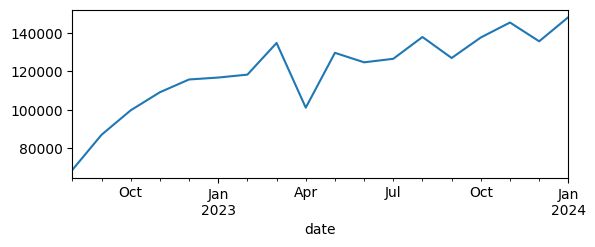

In [59]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo

plt.subplot(2,1,2)
datapar.numTrx.plot(style="-")

In [62]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo
datapar= datapar.drop(labels=['idCompany'], axis=1)

datapar.head()

,numTrx
date,
2022-08-01,68599
2022-09-01,86862
2022-10-01,99611
2022-11-01,109018
2022-12-01,115665


In [61]:
# Escalar entre -1 y 1 los datos de la variable a predecir
scalar = MinMaxScaler (feature_range=(-1,1))
datapar_arr = scalar.fit_transform(datapar)
datapar_arr

array([[-1.        , -1.        ],
       [-1.        , -0.5406228 ],
       [-1.        , -0.21994164],
       [-1.        ,  0.01667673],
       [-1.        ,  0.18387162],
       [-1.        ,  0.20920113],
       [-1.        ,  0.24748466],
       [-1.        ,  0.66198813],
       [-1.        , -0.18507898],
       [-1.        ,  0.53282523],
       [-1.        ,  0.40859241],
       [-1.        ,  0.45484958],
       [-1.        ,  0.74019016],
       [-1.        ,  0.46523795],
       [-1.        ,  0.73407788],
       [-1.        ,  0.92997283],
       [-1.        ,  0.6837207 ],
       [-1.        ,  1.        ]])

In [30]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento
steps= 6
xtrain=[]
ytrain=[]

for i in range(len(datapar_arr)-steps):
  xtrain.append(datapar_arr[i:i+steps])
  ytrain.append(datapar_arr[i+steps])


In [31]:
# Convertir las listas en arrays de numpy
xtrain=np.asanyarray(xtrain)
ytrain=np.asanyarray(ytrain)

In [32]:
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)
print("xtrain: {} ytrain:{}".format(xtrain.shape, ytrain.shape))

xtrain: (12, 6, 1) ytrain:(12, 1)


In [35]:
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura

# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 128 neuronas con activación relu
# Una capa LSTM de 64 neuronas con activación relu
# Una capa LSTM de 32 neuronas con activación relu
# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
# Finalmente agregar una capa densa de salida
# Imprimir el summary del  modelo
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(LSTM(units=512,return_sequences=True, activation="relu",input_shape=(steps,1)))
model.add(Dropout(0.05))
model.add(LSTM(units=256,return_sequences=True, activation="relu"))
model.add(Dropout(0.05))
model.add(LSTM(units=128,return_sequences=True, activation="relu"))
model.add(Dropout(0.05))
model.add(LSTM(units=64,return_sequences=True, activation="relu"))
model.add(Dropout(0.05))
model.add(LSTM(units=32,return_sequences=False, activation="relu"))
model.add(Dropout(0.05))

#capa densa
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(ytrain.shape[1]))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 6, 512)              │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 6, 256)              │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 6, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 6, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,111,617 (8.06 MB)

 Trainable params: 2,111,617 (8.06 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compilar el modelo con una funcion de error mse y un optimizador adam
model.compile(loss="mse", optimizer="adam")


In [38]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16

history= model.fit(xtrain, ytrain, epochs=100, validation_split=0.1, batch_size=16, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.3361 - val_loss: 0.6931
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - loss: 0.3121 - val_loss: 0.6491
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.2868 - val_loss: 0.6018
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 0.2608 - val_loss: 0.5513
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.2335 - val_loss: 0.4975
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.2056 - val_loss: 0.4408
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 0.1787 - val_loss: 0.3816
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 0.1527 - val_loss: 0.3204
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.1270 - val_loss: 0.2583
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 0.1065 - val_loss: 0.1971
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.0895 - val_loss: 0.1393
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.08

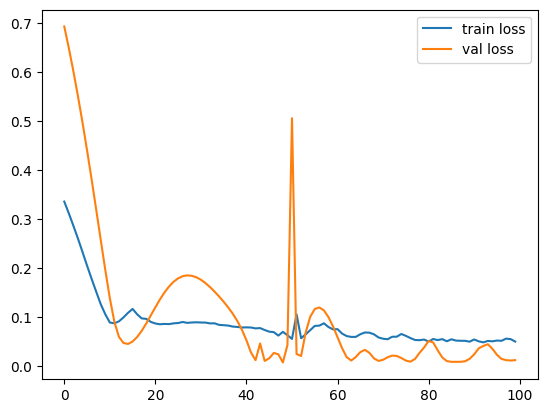

In [39]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.show()

In [40]:
# Guardar el modelo y salvarlo en disco
model.save('mi_modelo_parqueadero.h5')

In [72]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular
ver=np.array([68599,86862,99611,109018,115665])
ver_shape=ver.reshape(1,5,1)
print(ver_shape)

pred = model.predict(ver_shape)

print(pred)



[[[ 68599]
  [ 86862]
  [ 99611]
  [109018]
  [115665]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[57452.17]]


In [ ]:
# Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# realiza la predicción, o el número de dias festivos del mes de predicción

